#Инициализация основных объектов

### Вызов библиотек

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List

###Инициализация объекта "Точка"

In [19]:
class Point:
    def __init__(self, x=0, y=0):

        self.x = x
        self.y = y

    def print_point(self):
        return f"Point({self.x}, {self.y})"

    def point_position(a, b, p):
    #Если результат > 0 — точка выше прямой, < 0 — точка ниже прямой, 0 — точка на прямой
        return (b.x - a.x) * (p.y - a.y) - (b.y - a.y) * (p.x - a.x)

    def distance_to(self, other):
        return math.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

    def move_to(self, dx, dy):
        self.x += dx
        self.y += dy

###Инициализация объекта "Отрезок"

In [20]:
class Segment:
    def __init__(self, start_point, end_point):
        self.start_point = start_point
        self.end_point = end_point

    def print_segment(self):
        return f"Segment({Point.print_point(self.start_point)}, {Point.print_point(self.end_point)})"

    def length(self):
        return self.start_point.distance_to(self.end_point)

    def is_point_on_segment(self, point):
        tri_area = abs(
            (self.end_point.x - self.start_point.x) * (point.y - self.start_point.y) -
            (point.x - self.start_point.x) * (self.end_point.y - self.start_point.y)
        )

        on_segment = ((min(self.start_point.x, self.end_point.x) <= point.x <= max(self.start_point.x, self.end_point.x)) and \
                     (min(self.start_point.y, self.end_point.y) <= point.y <= max(self.start_point.y, self.end_point.y)))

        return tri_area == 0 and on_segment

    def get_points(segments):
        points = set()
        for segment in segments:
            points.add(segment.start_point)
            points.add(segment.end_point)
        return points

In [21]:
def ordered_pairs(points):
      ordered = []
      for i in points:
        for j in points:
            if i != j:
                ordered.append(Segment(i, j))
      return ordered

In [9]:
def point_place(Point, Segment):
    matx = [
        [Segment.start_point.x, Segment.start_point.y, 1],
        [Segment.end_point.x, Segment.end_point.y, 1],
        [Point.x, Point.y, 1]
    ]
    det = np.linalg.det(matx)
    return det

# Если det > 0, то точка Point образует с отрезком Segment левый поворот
# Если det < 0, то точка Point образует с отрезком Segment правый поворот
# Если det == 0 то точка лежит на прямой, на которой лежит отрезок Segment

###Входные данные
Входные данные алгоритмов построения выпуклой оболочки - это множество точек.

In [10]:
polygon_points = [
    Point(1.5, 1),
    Point(4, 1),
    Point(5, 3),
    Point(3, 5),
    Point(1, 3)
]

internal_points = [
    Point(2, 2),
    Point(3, 2),
    Point(2, 4),
    Point(2.5, 3),
    Point(3, 4)
]

all_points = polygon_points + internal_points

# Наивный алгоритм.  
Найти множество вершин из множества всех точек, принадлежащих фигуре. Пр. cложность: O(n^3)  
input: S - множество n точек на плоскости    
output: E - множество рёбер CH  
L(E) - Построение, являющееся выпуклой оболочкой для множества точек  


In [11]:
def naive_algorithm(S):
    E = []
    segments = ordered_pairs(S)

    for segment in segments:
        valid = True
        for s in S:
            if (s !=segment.start_point and s !=segment.end_point):
                tri_area = abs(
                (segment.end_point.x - segment.start_point.x) * (s.y - segment.start_point.y) -
                (s.x - segment.start_point.x) * (segment.end_point.y - segment.start_point.y)
                )
                on_segment = (
                    (min(segment.start_point.x, segment.end_point.x) <= s.x <= max(segment.start_point.x, segment.end_point.x)) and \
                    (min(segment.start_point.y, segment.end_point.y) <= s.y <= max(segment.start_point.y, segment.end_point.y))
                )
                if point_place(s, segment) < 0 or (tri_area == 0 and on_segment == 0):
                    valid = False
            else:
                continue
        if valid == True:
            E.append(segment)

    return E

# Инкрементный алгоритм. Модифицированный алгоритм Грехэма

In [12]:
def increment_alg(all_point):
    leftmost = min(all_points, key=lambda p: p.x)
    rightmost = max(all_points, key=lambda p: p.x)

    upper = []
    lower = []
    upper.append(leftmost)
    upper.append(rightmost)
    lower.append(leftmost)
    lower.append(rightmost)

    for point in all_points:
        if point != leftmost and point != rightmost:
            position = Point.point_position(leftmost, rightmost, point)
            if position >= 0:
                upper.append(point)
            elif position <= 0:
                lower.append(point)


    sorted_upper = sorted(upper, key=lambda p: p.x)
    sorted_lower = sorted(lower, key=lambda p: p.x)

    def upp_low_run(sorted_points, is_upper):
        l = []
        l.append(sorted_points[0])
        l.append(sorted_points[1])
        for i in range(2, len(sorted_points)):
            l.append(sorted_points[i])
            if is_upper == True:
                while len(l) >= 3 and point_place(l[len(l)-1], Segment(l[len(l)-3], l[len(l)-2])) >= 0:
                    l.pop(len(l)-2)
            else:
                while len(l) >= 3 and point_place(l[len(l)-1], Segment(l[len(l)-3], l[len(l)-2])) <= 0:
                    l.pop(len(l)-2)
        return l

    l_upper = upp_low_run(sorted_upper, True)
    l_lower = upp_low_run(sorted_lower, False)
    l_lower.reverse()
    return l_upper + l_lower

# Метод Джарвиса

In [13]:
def orientation(p: Point, q: Point, r: Point) -> int:

    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0  # коллинеарные
    elif val > 0:
        return 1  # по часовой стрелке
    else:
        return 2  # против часовой стрелки

def jarvis_march(points):

    n = len(points)
    if n < 3:
        return n

    lowest = 0
    for i in range(1, n):
        if points[i].y <= points[lowest].y and points[i].x < points[lowest].x:
            lowest = i

    hull = []


    p = lowest
    while True:
        hull.append(points[p])

        # ищем такую точку q, что все остальные точки находятся правее или на прямой с (p, q)
        q = (p + 1) % n

        for i in range(n):
            # если поворот против часовой стрелки, то q становится новой крайней точкой
            if orientation(points[p], points[i], points[q]) == 2:
                q = i

        p = q

        if p == lowest:
            hull.append(points[p])
            break


    return hull


# Метод Quick Hull

In [70]:
def distance_from_line(p1: Point, p2: Point, p: Point) -> float:
    return abs((p2.y - p1.y) * p.x - (p2.x - p1.x) * p.y + p2.x * p1.y - p2.y * p1.x) / \
           ((p2.y - p1.y) ** 2 + (p2.x - p1.x) ** 2) ** 0.5

def quick_hull(points, p1, p2, side, hull):
    # Находим точку с максимальным расстоянием от линии p1-p2
    max_point = None
    max_distance = 0

    for p in points:
        dist = distance_from_line(p1, p2, p)
        if Point.point_position(p1, p2, p) * side > 0 and dist > max_distance:
            max_point = p
            max_distance = dist

    if max_point is None:
        # Если не осталось точек на этой стороне, добавляем крайние точки в оболочку
        if p1 not in hull:
            hull.append(p1)
        if p2 not in hull:
            hull.append(p2)
        return

    # Рекурсивно разделяем на две подзадачи
    quick_hull(points, p1, max_point, -Point.point_position(p1, max_point, p2), hull)
    quick_hull(points, max_point, p2, -Point.point_position(max_point, p2, p1), hull)

def quick_hull_wrapper(points):

    if len(points) < 3:
        return points  # Выпуклая оболочка не существует, если меньше трёх точек

    # Шаг 1: Находим самую левую и самую правую точки
    min_point = min(points, key=lambda p: p.x)
    max_point = max(points, key=lambda p: p.x)

    hull = []

    # Шаг 2: Разделяем на две группы: выше и ниже линии min_point-max_point
    quick_hull(points, min_point, max_point, 1, hull)


    quick_hull(points, min_point, max_point, -1, hull)


    return hull

# Выходные данные
### Наивный алгоритм

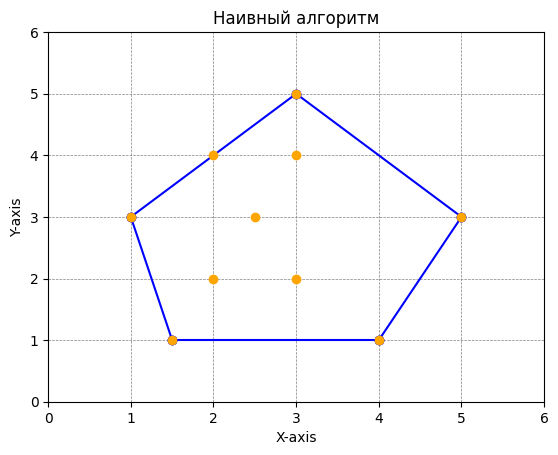

In [39]:
result_segments = naive_algorithm(all_points)

for segment in result_segments:
    # Координаты начала и конца каждого отрезка
    x_coords = [segment.start_point.x, segment.end_point.x]
    y_coords = [segment.start_point.y, segment.end_point.y]

    # Соединяем точки отрезка линией
    plt.plot(x_coords, y_coords, color='blue', marker='o', label='Segment')

for i in all_points:
    plt.plot(i.x, i.y, marker='o', color='orange')

plt.title('Наивный алгоритм')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(0, 6)
plt.ylim(0, 6)

plt.show()

### Инкрементный алгоритм

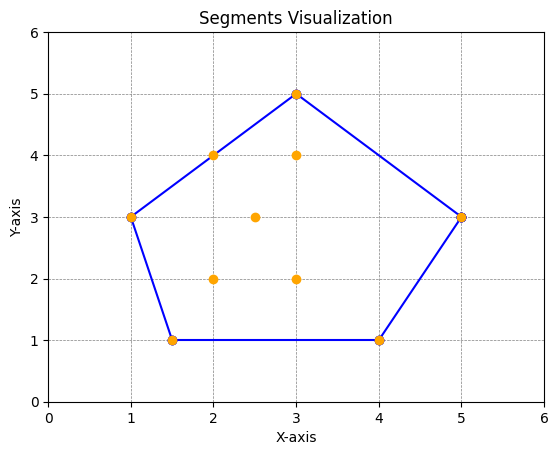

In [34]:
result_segments = increment_alg(all_points)

for i in range(len(result_segments)-1):
    x_values = [result_segments[i].x, result_segments[i+1].x]
    y_values = [result_segments[i].y, result_segments[i+1].y]
    plt.plot(x_values, y_values, marker='o', color='blue')

for i in all_points:
    plt.plot(i.x, i.y, marker='o', color='orange')

# Настройка осей и сетки
plt.title('Инкрементный алгоритм')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(0, 6)
plt.ylim(0, 6)

# Показать график
plt.show()

### Метод Джарвиса

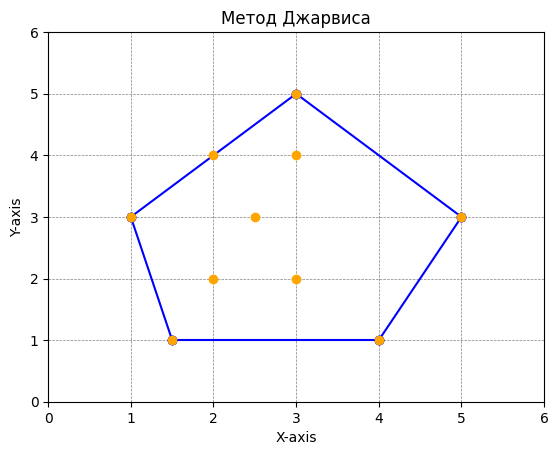

In [59]:
hull = jarvis_march(all_points)

for i in range(len(hull)-1):
    x_values = [hull[i].x, hull[i+1].x]
    y_values = [hull[i].y, hull[i+1].y]
    plt.plot(x_values, y_values, marker='o', color='blue')

for i in all_points:
    plt.plot(i.x, i.y, marker='o', color='orange')

plt.title('Метод Джарвиса')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()

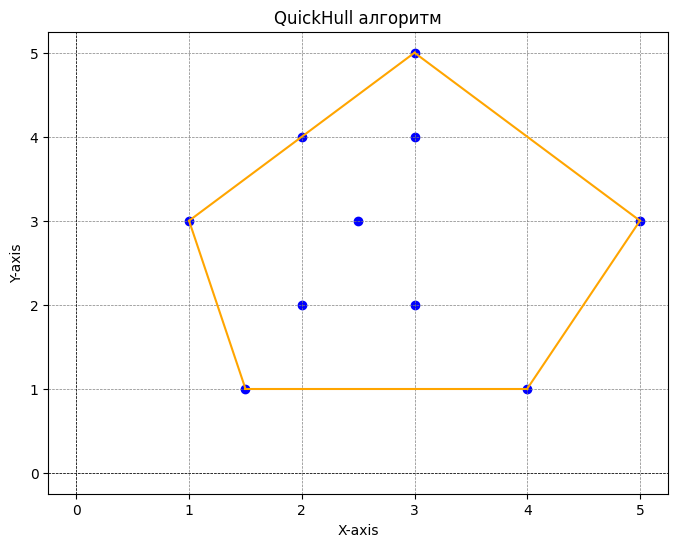

In [112]:
hull = quick_hull_wrapper(all_points)

plt.figure(figsize=(8, 6))

for p in all_points:
    plt.scatter(p.x, p.y, color="blue")

for i in range(2):
    p1 = hull[i]
    p2 = hull[(i + 1) % len(hull)]
    plt.plot([p1.x, p2.x], [p1.y, p2.y], color="orange")

hull.pop(1)

hull = sorted(hull, key=lambda p: p.x)

for i in range(3):
    p1 = hull[i]
    p2 = hull[(i + 1) % len(hull)]
    plt.plot([p1.x, p2.x], [p1.y, p2.y], color="orange")

plt.title("QuickHull алгоритм")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()